In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
try:
    sqlite_connection = sqlite3.connect('data/checking-logs.sqlite.sqlite')
except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
print('УСПЕШНО')

УСПЕШНО


In [8]:
request = "select uid, timestamp from checker where uid like 'user_%'"
commits = pd.io.sql.read_sql(request, sqlite_connection, parse_dates=['timestamp'])
commits

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [9]:
commits['date'] = commits['timestamp'].dt.floor('d')
commits['hour'] = commits['timestamp'].dt.hour
commits = commits.drop('timestamp', axis=1)
commits

,uid,date,hour
0,user_4,2020-04-17,5
1,user_4,2020-04-17,5
2,user_4,2020-04-17,5
3,user_4,2020-04-17,5
4,user_4,2020-04-17,5
...,...,...,...
3202,user_1,2020-05-21,20
3203,user_1,2020-05-21,20
3204,user_1,2020-05-21,20
3205,user_1,2020-05-21,20


In [10]:
working_day = commits.loc[commits['date'].dt.dayofweek < 5]['hour']
weekend = commits.loc[commits['date'].dt.dayofweek >= 5]['hour']
working_day = working_day.reset_index(drop=True)
weekend = weekend.reset_index(drop=True)
working_day

0        5
1        5
2        5
3        5
4        5
        ..
2032    20
2033    20
2034    20
2035    20
2036    20
Name: hour, Length: 2037, dtype: int64

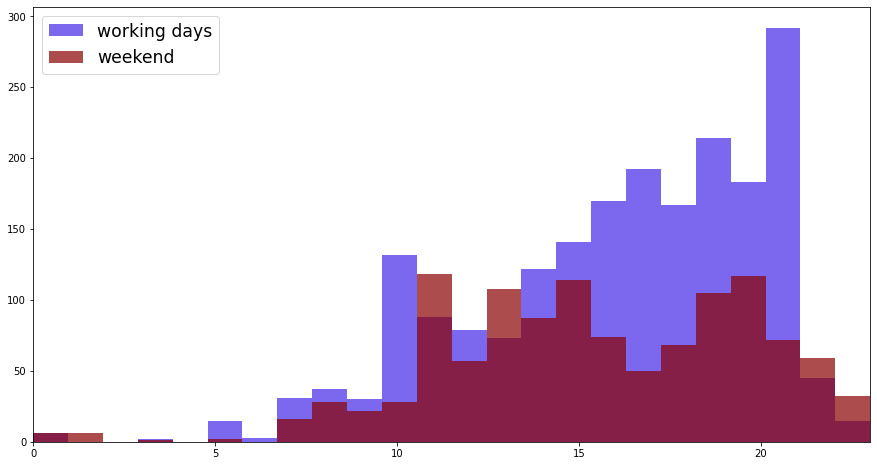

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(working_day, bins=24, label='working days', color='mediumslateblue')
ax.hist(weekend, bins=24, label='weekend', color='darkred', alpha=0.7)
ax.set_xlim(0, 23)
ax.legend(loc='upper left', fontsize='xx-large')
plt.show()

In [12]:
df_1 = working_day.value_counts()
df_1 = df_1.sort_index()
df_1 = df_1.rename('working_day')
df_1 = df_1.to_frame()
df_1

,working_day
0,6
3,2
5,15
6,3
7,31
8,37
9,30
10,132
11,88
12,79


In [13]:
df_2 = weekend.value_counts()
df_2 = df_2.sort_index()
df_2 = df_2.rename('weekend')
df_2 = df_2.to_frame()
df_2

,weekend
0,6
1,6
3,1
5,2
7,16
8,28
9,22
10,28
11,118
12,57


In [14]:
df = df_1.join(df_2, how='inner')
df = df.rename_axis('hour')
df

,working_day,weekend
hour,,
0,6,6
3,2,1
5,15,2
7,31,16
8,37,28
9,30,22
10,132,28
11,88,118
12,79,57


In [15]:
df.loc[df['working_day'] < df['weekend']]

,working_day,weekend
hour,,
11,88,118
13,73,108
22,45,59
23,15,32


“Are there hours when the total number of commits was higher on weekends than
on working days?” In your answer, put the top-4 examples.

11, 13, 22, 23

In [ ]:
sqlite_connection.close()